<a href="https://colab.research.google.com/github/Ahmad-s-zaky/Tugas_Kecerdasan-Buatan/blob/main/TugasModul8_2106123_Ahmad_S_Zaky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, davies_bouldin_score

In [27]:
dataset = pd.read_csv('diamonds.csv')

print('Sample Data:')
dataset.head()

Sample Data:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [28]:
dataset.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          1
y          1
z          1
dtype: int64

In [29]:
dataset.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [39]:
x = dataset.iloc[:, :1]
y = dataset['clarity']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=0)

In [40]:
dt = DecisionTreeClassifier()
dt.fit(xTrain, yTrain)

DecisionTreeClassifier()

In [41]:
print('Decision Tree Accuracy: {:.3f}'.format(accuracy_score(yTest, dt.predict(xTest))))

Decision Tree Accuracy: 0.321


[Text(0.45008992805755393, 0.9642857142857143, 'x[0] <= 0.785\ngini = 0.797\nsamples = 15810\nvalue = [318, 208, 4252, 3751, 2293, 3445, 524, 1019]'),
 Text(0.10251798561151079, 0.8928571428571429, 'x[0] <= 0.295\ngini = 0.816\nsamples = 3384\nvalue = [7, 113, 663, 227, 761, 854, 322, 437]'),
 Text(0.03836930455635491, 0.8214285714285714, 'x[0] <= 0.245\ngini = 0.766\nsamples = 310\nvalue = [0, 20, 4, 3, 57, 43, 81, 102]'),
 Text(0.019184652278177457, 0.75, 'x[0] <= 0.225\ngini = 0.775\nsamples = 79\nvalue = [0, 5, 2, 2, 22, 21, 20, 7]'),
 Text(0.009592326139088728, 0.6785714285714286, 'x[0] <= 0.21\ngini = 0.444\nsamples = 3\nvalue = [0, 0, 0, 1, 0, 2, 0, 0]'),
 Text(0.004796163069544364, 0.6071428571428571, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0, 0, 0]'),
 Text(0.014388489208633094, 0.6071428571428571, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 2, 0, 0]'),
 Text(0.02877697841726619, 0.6785714285714286, 'x[0] <= 0.235\ngini = 0.771\nsamples = 76\nvalue = [0, 5, 2, 

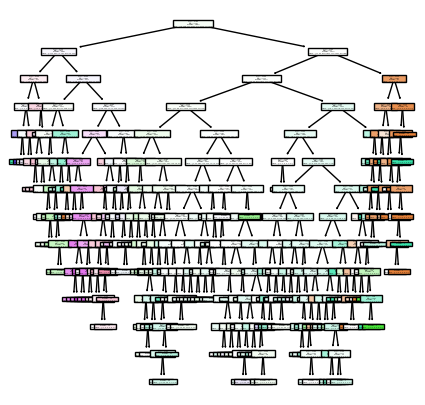

In [42]:
plt.figure(figsize=(5, 5))
tree.plot_tree(dt, filled=True)

In [46]:
kMeans = KMeans(n_clusters=5)
labels = kMeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [47]:
db_score = davies_bouldin_score(x, labels)
print(db_score)

0.3739066364573104


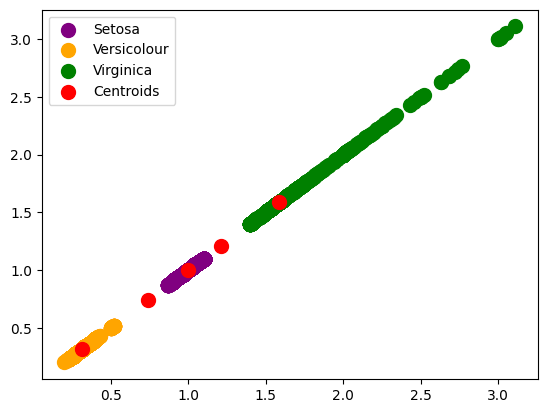

In [59]:
cols = dataset.columns
plt.scatter(x.loc[labels == 0, cols[0]],
            x.loc[labels == 0, cols[0]],
            s=100, c='purple',
            label='Setosa')

plt.scatter(x.loc[labels == 1, cols[0]],
            x.loc[labels == 1, cols[0]],
            s=100, c='orange',
            label='Versicolour')

plt.scatter(x.loc[labels == 2, cols[0]],
            x.loc[labels == 2, cols[0]],
            s=100, c='green',
            label='Virginica')

plt.scatter(kMeans.cluster_centers_[:, 0],
            kMeans.cluster_centers_[:, 0],
            s=100, c='red',
            label='Centroids')

plt.legend()